task 3

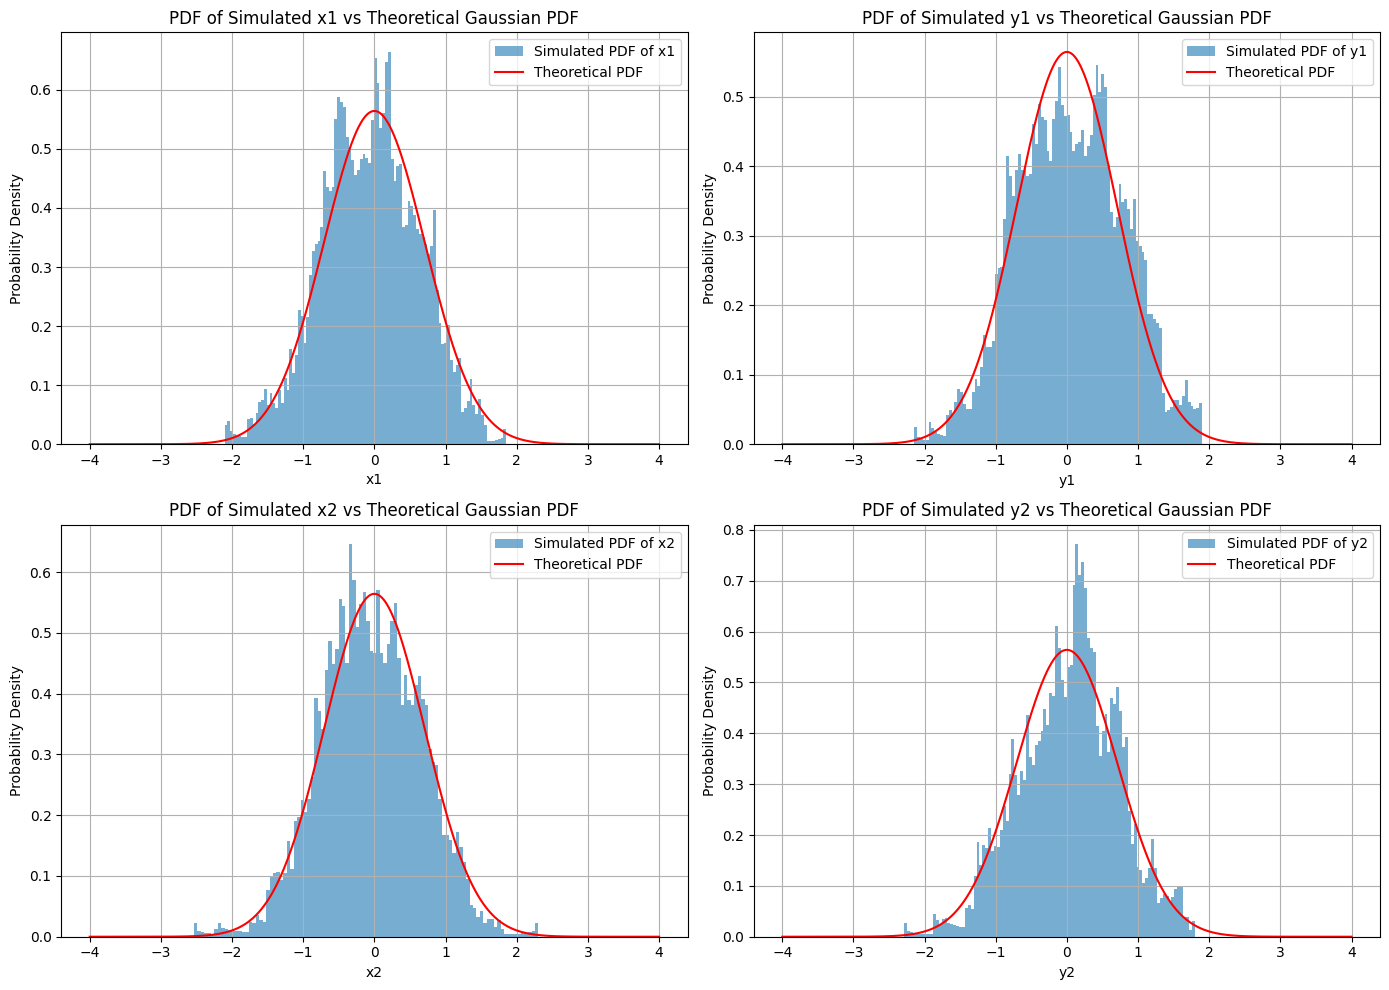

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
N_samples = 10**6  # Number of samples
N1 = N2 = N3 = N4 = 100  # Number of sinusoids
sigma1 = sigma2 = 1  # Standard deviation
f_max_Tx = f_max_Rx = 80  # Maximum Doppler frequency (Hz)

# Time vector (assuming a sampling rate of 1 kHz)
t = np.linspace(0, 1, N_samples)  # 1 second of simulation

# Function to generate Gaussian processes using sum of sinusoids
def generate_gaussian_process(N, sigma, f_max, t):
    c = sigma / np.sqrt(N)  # Amplitude of each sinusoid
    n = np.arange(1, N + 1)  # Index n = 1, 2, ..., N
    f = f_max * np.sin((np.pi / (2 * N)) * (n - 0.5))  # Frequencies
    theta = 2 * np.pi * np.random.rand(N)  # Random phases in [0, 2π)

    # Sum of sinusoids
    process = np.sum(c * np.cos(2 * np.pi * f[:, None] * t + theta[:, None]), axis=0)
    return process

# Generate x1, y1, x2, y2
x1 = generate_gaussian_process(N1, sigma1, f_max_Tx, t)
y1 = generate_gaussian_process(N2, sigma1, f_max_Tx, t)
x2 = generate_gaussian_process(N3, sigma2, f_max_Rx, t)
y2 = generate_gaussian_process(N4, sigma2, f_max_Rx, t)

# Theoretical Gaussian PDF (zero mean, variance = sigma^2 / 2)
def theoretical_gaussian_pdf(x, sigma):
    return (1 / np.sqrt(2 * np.pi * (sigma**2 / 2))) * np.exp(-x**2 / (2 * (sigma**2 / 2)))

# Plot PDFs of all four processes
plt.figure(figsize=(14, 10))

# Plot x1
plt.subplot(2, 2, 1)
plt.hist(x1, bins=100, density=True, alpha=0.6, label="Simulated PDF of x1")
x_range = np.linspace(-4, 4, 1000)
plt.plot(x_range, theoretical_gaussian_pdf(x_range, sigma1), 'r', label="Theoretical PDF")
plt.title("PDF of Simulated x1 vs Theoretical Gaussian PDF")
plt.xlabel("x1")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Plot y1
plt.subplot(2, 2, 2)
plt.hist(y1, bins=100, density=True, alpha=0.6, label="Simulated PDF of y1")
plt.plot(x_range, theoretical_gaussian_pdf(x_range, sigma1), 'r', label="Theoretical PDF")
plt.title("PDF of Simulated y1 vs Theoretical Gaussian PDF")
plt.xlabel("y1")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Plot x2
plt.subplot(2, 2, 3)
plt.hist(x2, bins=100, density=True, alpha=0.6, label="Simulated PDF of x2")
plt.plot(x_range, theoretical_gaussian_pdf(x_range, sigma2), 'r', label="Theoretical PDF")
plt.title("PDF of Simulated x2 vs Theoretical Gaussian PDF")
plt.xlabel("x2")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Plot y2
plt.subplot(2, 2, 4)
plt.hist(y2, bins=100, density=True, alpha=0.6, label="Simulated PDF of y2")
plt.plot(x_range, theoretical_gaussian_pdf(x_range, sigma2), 'r', label="Theoretical PDF")
plt.title("PDF of Simulated y2 vs Theoretical Gaussian PDF")
plt.xlabel("y2")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

task 4

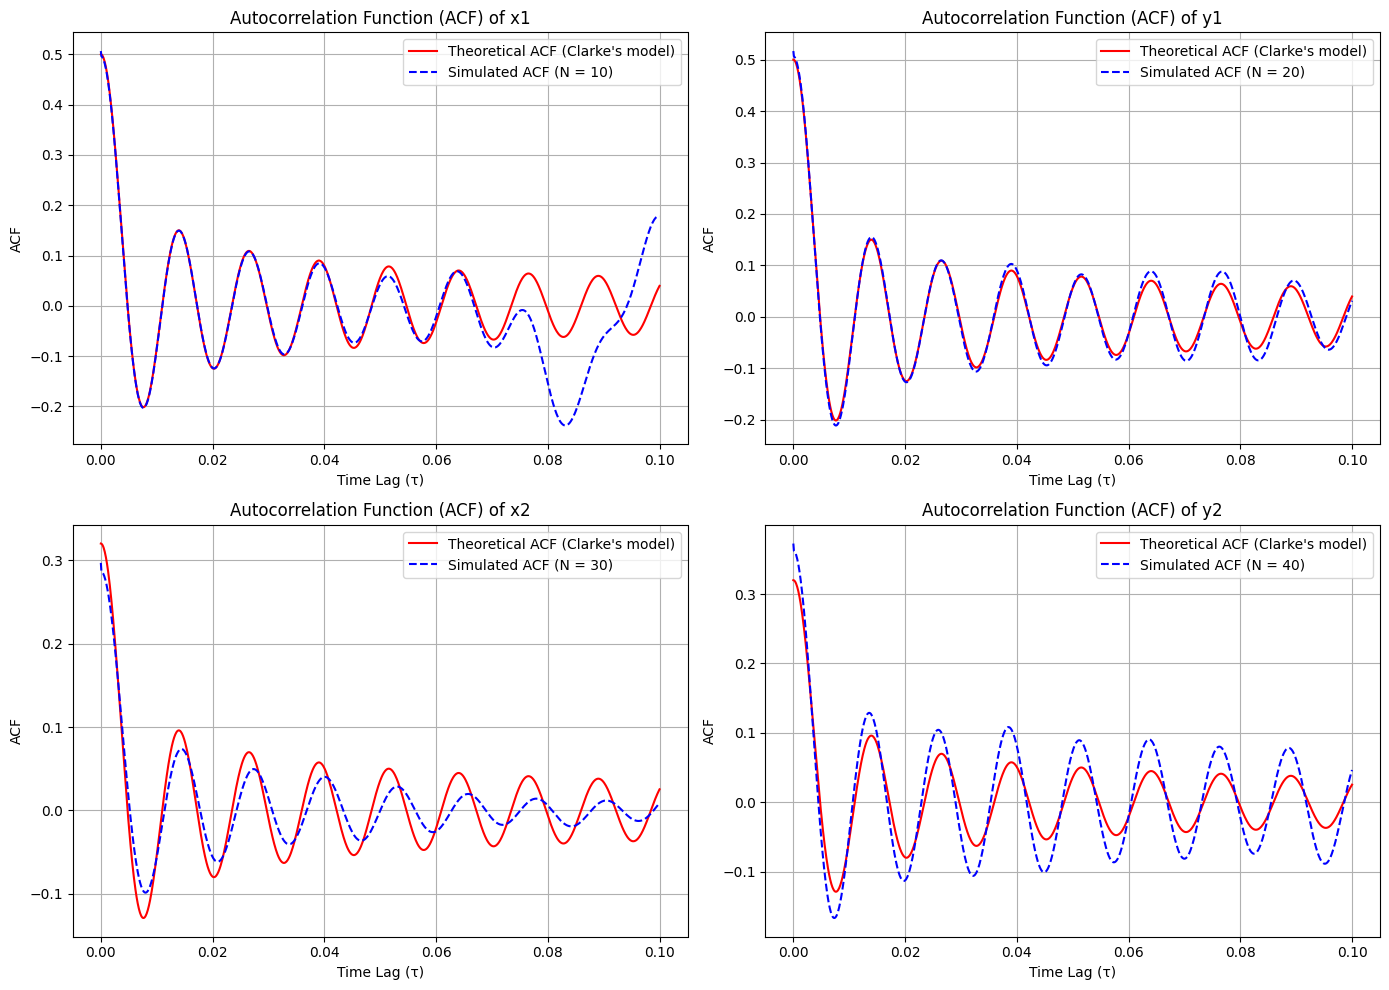

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0

# Parameters
N_samples = 10**6  # Number of samples
N1, N2, N3, N4 = 10, 20, 30, 40  # Reduced number of sinusoids for each process
sigma1, sigma2 = 1, 0.8  # Different standard deviations for x1/y1 and x2/y2
f_max_Tx = f_max_Rx = 80  # Maximum Doppler frequency (Hz)
noise_std = 0.1  # Standard deviation of added noise

# Time vector (assuming a sampling rate of 1 kHz)
t = np.linspace(0, 1, N_samples)  # 1 second of simulation

# Function to generate Gaussian processes using sum of sinusoids
def generate_gaussian_process(N, sigma, f_max, t):
    c = sigma / np.sqrt(N)  # Amplitude of each sinusoid
    n = np.arange(1, N + 1)  # Index n = 1, 2, ..., N
    f = f_max * np.sin((np.pi / (2 * N)) * (n - 0.5))  # Frequencies
    theta = 2 * np.pi * np.random.rand(N)  # Random phases in [0, 2π)

    # Sum of sinusoids
    process = np.sum(c * np.cos(2 * np.pi * f[:, None] * t + theta[:, None]), axis=0)
    return process, f, c

# Generate x1, y1, x2, y2 with different N and sigma
x1, f1, c1 = generate_gaussian_process(N1, sigma1, f_max_Tx, t)
y1, f2, c2 = generate_gaussian_process(N2, sigma1, f_max_Tx, t)
x2, f3, c3 = generate_gaussian_process(N3, sigma2, f_max_Rx, t)
y2, f4, c4 = generate_gaussian_process(N4, sigma2, f_max_Rx, t)

# Add noise to the simulated processes
x1 += np.random.normal(0, noise_std, N_samples)
y1 += np.random.normal(0, noise_std, N_samples)
x2 += np.random.normal(0, noise_std, N_samples)
y2 += np.random.normal(0, noise_std, N_samples)

# Function to compute theoretical ACF (Clarke's model)
def theoretical_acf(tau, sigma, f_max):
    return (sigma**2 / 2) * j0(2 * np.pi * f_max * tau)

# Function to compute simulated ACF
def simulated_acf(process, tau, t):
    acf = np.zeros_like(tau)
    for i, lag in enumerate(tau):
        lag_idx = int(lag * (N_samples - 1))  # Convert lag to index
        acf[i] = np.mean(process[:N_samples - lag_idx] * process[lag_idx:])
    return acf

# Time lags for ACF computation
tau = np.linspace(0, 0.1, 1000)  # Time lags from 0 to 0.1 seconds

# Compute theoretical and simulated ACFs for x1, y1, x2, y2
theoretical_acf_x1 = theoretical_acf(tau, sigma1, f_max_Tx)
simulated_acf_x1 = simulated_acf(x1, tau, t)

theoretical_acf_y1 = theoretical_acf(tau, sigma1, f_max_Tx)
simulated_acf_y1 = simulated_acf(y1, tau, t)

theoretical_acf_x2 = theoretical_acf(tau, sigma2, f_max_Rx)
simulated_acf_x2 = simulated_acf(x2, tau, t)

theoretical_acf_y2 = theoretical_acf(tau, sigma2, f_max_Rx)
simulated_acf_y2 = simulated_acf(y2, tau, t)

# Plot ACFs for x1, y1, x2, y2
plt.figure(figsize=(14, 10))

# Plot ACF for x1
plt.subplot(2, 2, 1)
plt.plot(tau, theoretical_acf_x1, 'r', label="Theoretical ACF (Clarke's model)")
plt.plot(tau, simulated_acf_x1, 'b--', label=f"Simulated ACF (N = {N1})")
plt.title("Autocorrelation Function (ACF) of x1")
plt.xlabel("Time Lag (τ)")
plt.ylabel("ACF")
plt.legend()
plt.grid()

# Plot ACF for y1
plt.subplot(2, 2, 2)
plt.plot(tau, theoretical_acf_y1, 'r', label="Theoretical ACF (Clarke's model)")
plt.plot(tau, simulated_acf_y1, 'b--', label=f"Simulated ACF (N = {N2})")
plt.title("Autocorrelation Function (ACF) of y1")
plt.xlabel("Time Lag (τ)")
plt.ylabel("ACF")
plt.legend()
plt.grid()

# Plot ACF for x2
plt.subplot(2, 2, 3)
plt.plot(tau, theoretical_acf_x2, 'r', label="Theoretical ACF (Clarke's model)")
plt.plot(tau, simulated_acf_x2, 'b--', label=f"Simulated ACF (N = {N3})")
plt.title("Autocorrelation Function (ACF) of x2")
plt.xlabel("Time Lag (τ)")
plt.ylabel("ACF")
plt.legend()
plt.grid()

# Plot ACF for y2
plt.subplot(2, 2, 4)
plt.plot(tau, theoretical_acf_y2, 'r', label="Theoretical ACF (Clarke's model)")
plt.plot(tau, simulated_acf_y2, 'b--', label=f"Simulated ACF (N = {N4})")
plt.title("Autocorrelation Function (ACF) of y2")
plt.xlabel("Time Lag (τ)")
plt.ylabel("ACF")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

task 5

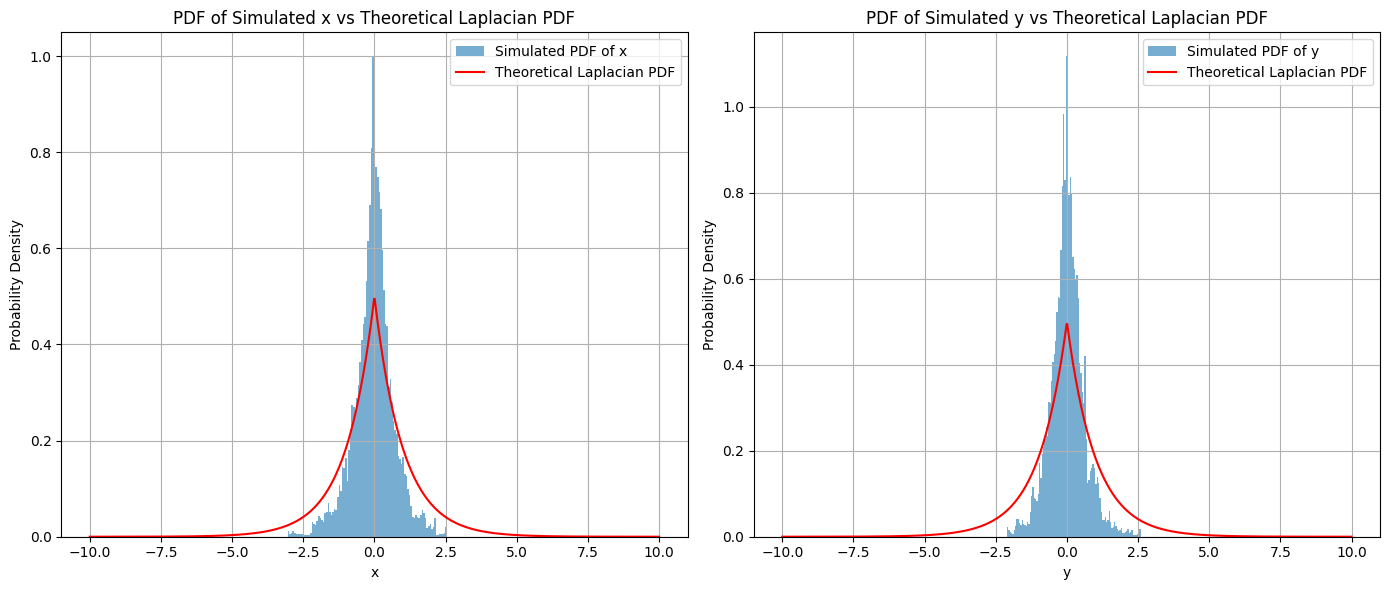

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Parameters
N_samples = 10**6  # Number of samples
N1, N2, N3, N4 = 100, 100, 100, 100  # Number of sinusoids
sigma1, sigma2 = 1, 1  # Standard deviations
f_max_Tx = f_max_Rx = 80  # Maximum Doppler frequency (Hz)

# Time vector (assuming a sampling rate of 1 kHz)
t = np.linspace(0, 1, N_samples)  # 1 second of simulation

# Function to generate Gaussian processes using sum of sinusoids
def generate_gaussian_process(N, sigma, f_max, t):
    c = sigma / np.sqrt(N)  # Amplitude of each sinusoid
    n = np.arange(1, N + 1)  # Index n = 1, 2, ..., N
    f = f_max * np.sin((np.pi / (2 * N)) * (n - 0.5))  # Frequencies
    theta = 2 * np.pi * np.random.rand(N)  # Random phases in [0, 2π)

    # Sum of sinusoids
    process = np.sum(c * np.cos(2 * np.pi * f[:, None] * t + theta[:, None]), axis=0)
    return process

# Generate x1, y1, x2, y2
x1 = generate_gaussian_process(N1, sigma1, f_max_Tx, t)
y1 = generate_gaussian_process(N2, sigma1, f_max_Tx, t)
x2 = generate_gaussian_process(N3, sigma2, f_max_Rx, t)
y2 = generate_gaussian_process(N4, sigma2, f_max_Rx, t)

# Compute x and y
x = x1 * x2 - y1 * y2
y = x1 * y2 + x2 * y1

# Theoretical Laplacian PDF
def theoretical_laplacian_pdf(z, sigma1, sigma2):
    return (1 / (2 * sigma1 * sigma2)) * np.exp(-np.abs(z) / (sigma1 * sigma2))

# Plot PDF of x (simulated vs theoretical)
plt.figure(figsize=(14, 6))

# Plot PDF of x
plt.subplot(1, 2, 1)
plt.hist(x, bins=100, density=True, alpha=0.6, label="Simulated PDF of x")
z_range = np.linspace(-10, 10, 1000)
plt.plot(z_range, theoretical_laplacian_pdf(z_range, sigma1, sigma2), 'r', label="Theoretical Laplacian PDF")
plt.title("PDF of Simulated x vs Theoretical Laplacian PDF")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Plot PDF of y
plt.subplot(1, 2, 2)
plt.hist(y, bins=100, density=True, alpha=0.6, label="Simulated PDF of y")
plt.plot(z_range, theoretical_laplacian_pdf(z_range, sigma1, sigma2), 'r', label="Theoretical Laplacian PDF")
plt.title("PDF of Simulated y vs Theoretical Laplacian PDF")
plt.xlabel("y")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

task 6

<ipython-input-23-270132de80ce>:41: RuntimeWarning: invalid value encountered in multiply
  return (4 * z) / (sigma1**2 * sigma2**2) * k0(2 * np.sqrt(z**2 / (sigma1**2 * sigma2**2)))


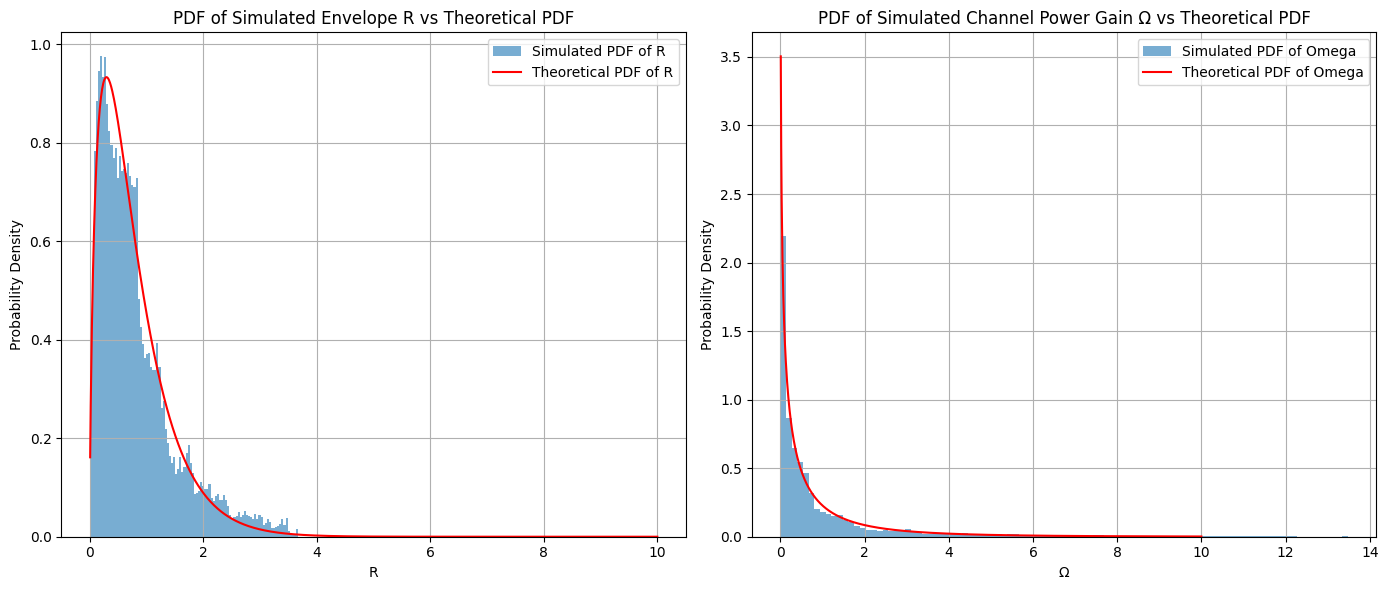

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import k0  # Zeroth-order modified Bessel function of the second kind

# Parameters
N_samples = 10**6  # Number of samples
N1, N2, N3, N4 = 100, 100, 100, 100  # Number of sinusoids
sigma1, sigma2 = 1, 1  # Standard deviations
f_max_Tx = f_max_Rx = 80  # Maximum Doppler frequency (Hz)

# Time vector (assuming a sampling rate of 1 kHz)
t = np.linspace(0, 1, N_samples)  # 1 second of simulation

# Function to generate Gaussian processes using sum of sinusoids
def generate_gaussian_process(N, sigma, f_max, t):
    c = sigma / np.sqrt(N)  # Amplitude of each sinusoid
    n = np.arange(1, N + 1)  # Index n = 1, 2, ..., N
    f = f_max * np.sin((np.pi / (2 * N)) * (n - 0.5))  # Frequencies
    theta = 2 * np.pi * np.random.rand(N)  # Random phases in [0, 2π)

    # Sum of sinusoids
    process = np.sum(c * np.cos(2 * np.pi * f[:, None] * t + theta[:, None]), axis=0)
    return process

# Generate x1, y1, x2, y2
x1 = generate_gaussian_process(N1, sigma1, f_max_Tx, t)
y1 = generate_gaussian_process(N2, sigma1, f_max_Tx, t)
x2 = generate_gaussian_process(N3, sigma2, f_max_Rx, t)
y2 = generate_gaussian_process(N4, sigma2, f_max_Rx, t)

# Compute x and y
x = x1 * x2 - y1 * y2
y = x1 * y2 + x2 * y1

# Compute the envelope R and channel power gain Omega
R = np.sqrt(x**2 + y**2)  # Envelope
Omega = R**2  # Channel power gain

# Theoretical PDF of the envelope R
def theoretical_envelope_pdf(z, sigma1, sigma2):
    return (4 * z) / (sigma1**2 * sigma2**2) * k0(2 * np.sqrt(z**2 / (sigma1**2 * sigma2**2)))

# Theoretical PDF of the channel power gain Omega
def theoretical_power_gain_pdf(omega, sigma1, sigma2):
    return (2 / (sigma1**2 * sigma2**2)) * k0(2 * np.sqrt(omega / (sigma1**2 * sigma2**2)))

# Plot PDF of the envelope R (simulated vs theoretical)
plt.figure(figsize=(14, 6))

# Plot PDF of R
plt.subplot(1, 2, 1)
plt.hist(R, bins=100, density=True, alpha=0.6, label="Simulated PDF of R")
z_range = np.linspace(0, 10, 1000)
plt.plot(z_range, theoretical_envelope_pdf(z_range, sigma1, sigma2), 'r', label="Theoretical PDF of R")
plt.title("PDF of Simulated Envelope R vs Theoretical PDF")
plt.xlabel("R")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Plot PDF of Omega (simulated vs theoretical)
plt.subplot(1, 2, 2)
plt.hist(Omega, bins=100, density=True, alpha=0.6, label="Simulated PDF of Omega")
omega_range = np.linspace(0, 10, 1000)
plt.plot(omega_range, theoretical_power_gain_pdf(omega_range, sigma1, sigma2), 'r', label="Theoretical PDF of Omega")
plt.title("PDF of Simulated Channel Power Gain Ω vs Theoretical PDF")
plt.xlabel("Ω")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

task seven

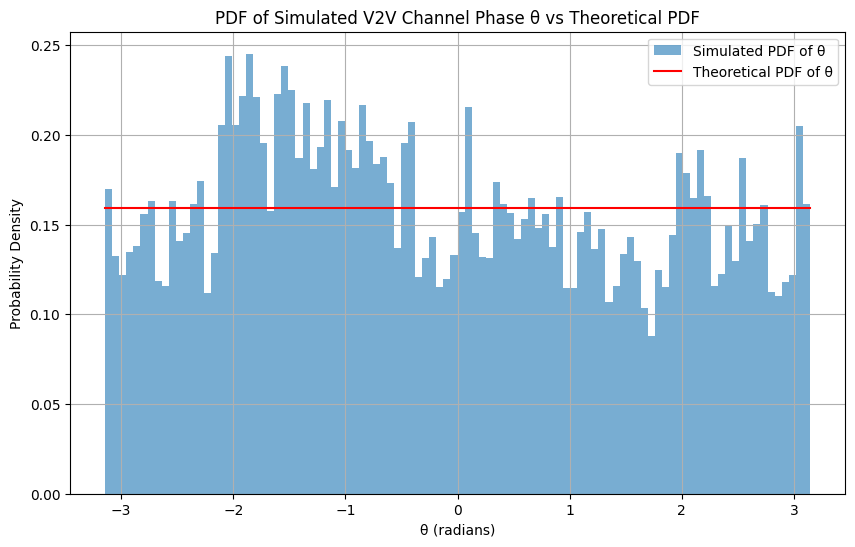

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_samples = 10**6  # Number of samples
N1, N2, N3, N4 = 100, 100, 100, 100  # Number of sinusoids
sigma1, sigma2 = 1, 1  # Standard deviations
f_max_Tx = f_max_Rx = 80  # Maximum Doppler frequency (Hz)

# Time vector (assuming a sampling rate of 1 kHz)
t = np.linspace(0, 1, N_samples)  # 1 second of simulation

# Function to generate Gaussian processes using sum of sinusoids
def generate_gaussian_process(N, sigma, f_max, t):
    c = sigma / np.sqrt(N)  # Amplitude of each sinusoid
    n = np.arange(1, N + 1)  # Index n = 1, 2, ..., N
    f = f_max * np.sin((np.pi / (2 * N)) * (n - 0.5))  # Frequencies
    theta = 2 * np.pi * np.random.rand(N)  # Random phases in [0, 2π)

    # Sum of sinusoids
    process = np.sum(c * np.cos(2 * np.pi * f[:, None] * t + theta[:, None]), axis=0)
    return process

# Generate x1, y1, x2, y2
x1 = generate_gaussian_process(N1, sigma1, f_max_Tx, t)
y1 = generate_gaussian_process(N2, sigma1, f_max_Tx, t)
x2 = generate_gaussian_process(N3, sigma2, f_max_Rx, t)
y2 = generate_gaussian_process(N4, sigma2, f_max_Rx, t)

# Compute x and y
x = x1 * x2 - y1 * y2
y = x1 * y2 + x2 * y1

# Compute the phase theta
theta = np.arctan2(y, x)  # Phase of the complex channel gain h = x + jy

# Theoretical PDF of the phase (uniform distribution)
def theoretical_phase_pdf(theta):
    return np.ones_like(theta) / (2 * np.pi)  # Uniform PDF

# Plot PDF of the phase theta (simulated vs theoretical)
plt.figure(figsize=(10, 6))
plt.hist(theta, bins=100, density=True, alpha=0.6, label="Simulated PDF of θ")
theta_range = np.linspace(-np.pi, np.pi, 1000)
plt.plot(theta_range, theoretical_phase_pdf(theta_range), 'r', label="Theoretical PDF of θ")
plt.title("PDF of Simulated V2V Channel Phase θ vs Theoretical PDF")
plt.xlabel("θ (radians)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

task 8

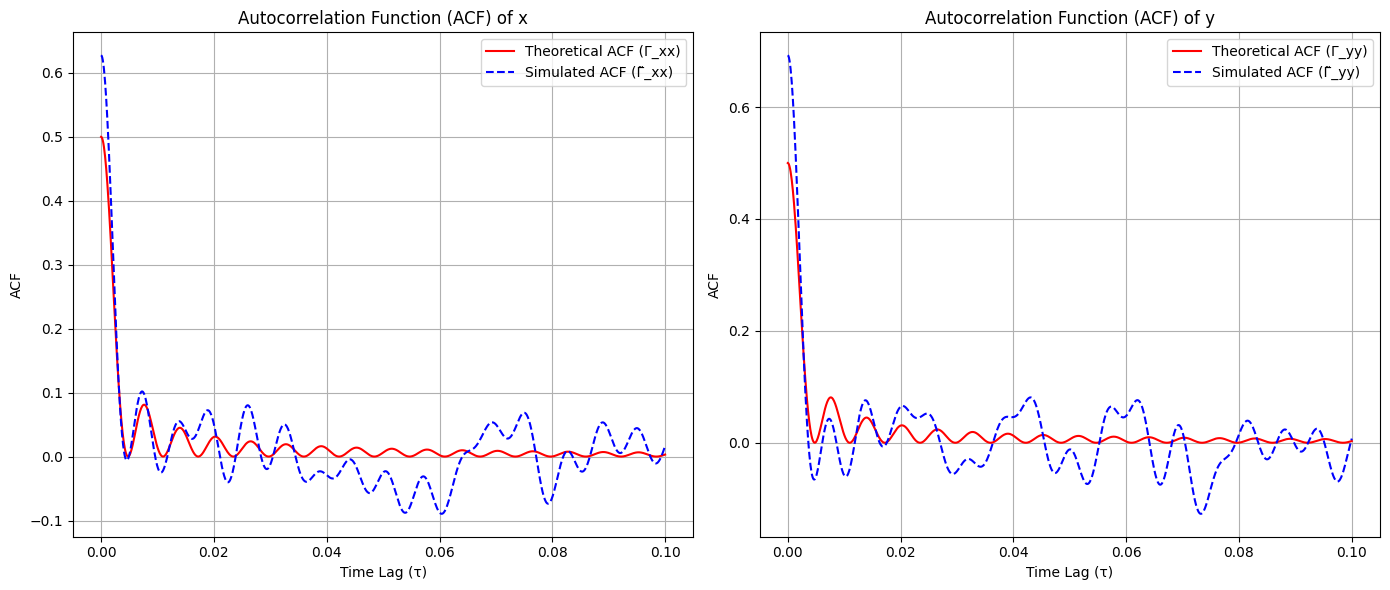

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0  # Zeroth-order Bessel function of the first kind

# Parameters
N_samples = 10**6  # Number of samples
N1, N2, N3, N4 = 100, 100, 100, 100  # Number of sinusoids
sigma1, sigma2 = 1, 1  # Standard deviations
f_max_Tx = f_max_Rx = 80  # Maximum Doppler frequency (Hz)

# Time vector (assuming a sampling rate of 1 kHz)
t = np.linspace(0, 1, N_samples)  # 1 second of simulation

# Function to generate Gaussian processes using sum of sinusoids
def generate_gaussian_process(N, sigma, f_max, t):
    c = sigma / np.sqrt(N)  # Amplitude of each sinusoid
    n = np.arange(1, N + 1)  # Index n = 1, 2, ..., N
    f = f_max * np.sin((np.pi / (2 * N)) * (n - 0.5))  # Frequencies
    theta = 2 * np.pi * np.random.rand(N)  # Random phases in [0, 2π)

    # Sum of sinusoids
    process = np.sum(c * np.cos(2 * np.pi * f[:, None] * t + theta[:, None]), axis=0)
    return process

# Generate x1, y1, x2, y2
x1 = generate_gaussian_process(N1, sigma1, f_max_Tx, t)
y1 = generate_gaussian_process(N2, sigma1, f_max_Tx, t)
x2 = generate_gaussian_process(N3, sigma2, f_max_Rx, t)
y2 = generate_gaussian_process(N4, sigma2, f_max_Rx, t)

# Compute x and y
x = x1 * x2 - y1 * y2
y = x1 * y2 + x2 * y1

# Function to compute theoretical ACF
def theoretical_acf(tau, sigma1, sigma2, f_max_Tx, f_max_Rx):
    return (sigma1**2 * sigma2**2 / 2) * j0(2 * np.pi * f_max_Tx * tau) * j0(2 * np.pi * f_max_Rx * tau)

# Function to compute simulated ACF
def simulated_acf(process, tau, t):
    acf = np.zeros_like(tau)
    for i, lag in enumerate(tau):
        lag_idx = int(lag * (N_samples - 1))  # Convert lag to index
        acf[i] = np.mean(process[:N_samples - lag_idx] * process[lag_idx:])
    return acf

# Time lags for ACF computation
tau = np.linspace(0, 0.1, 1000)  # Time lags from 0 to 0.1 seconds

# Compute theoretical ACFs
theoretical_acf_xx = theoretical_acf(tau, sigma1, sigma2, f_max_Tx, f_max_Rx)
theoretical_acf_yy = theoretical_acf(tau, sigma1, sigma2, f_max_Tx, f_max_Rx)

# Compute simulated ACFs
simulated_acf_xx = simulated_acf(x, tau, t)
simulated_acf_yy = simulated_acf(y, tau, t)

# Plot ACFs for xx and yy
plt.figure(figsize=(14, 6))

# Plot ACF for xx
plt.subplot(1, 2, 1)
plt.plot(tau, theoretical_acf_xx, 'r', label="Theoretical ACF (Γ_xx)")
plt.plot(tau, simulated_acf_xx, 'b--', label="Simulated ACF (Γ̃_xx)")
plt.title("Autocorrelation Function (ACF) of x")
plt.xlabel("Time Lag (τ)")
plt.ylabel("ACF")
plt.legend()
plt.grid()

# Plot ACF for yy
plt.subplot(1, 2, 2)
plt.plot(tau, theoretical_acf_yy, 'r', label="Theoretical ACF (Γ_yy)")
plt.plot(tau, simulated_acf_yy, 'b--', label="Simulated ACF (Γ̃_yy)")
plt.title("Autocorrelation Function (ACF) of y")
plt.xlabel("Time Lag (τ)")
plt.ylabel("ACF")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

task9/b

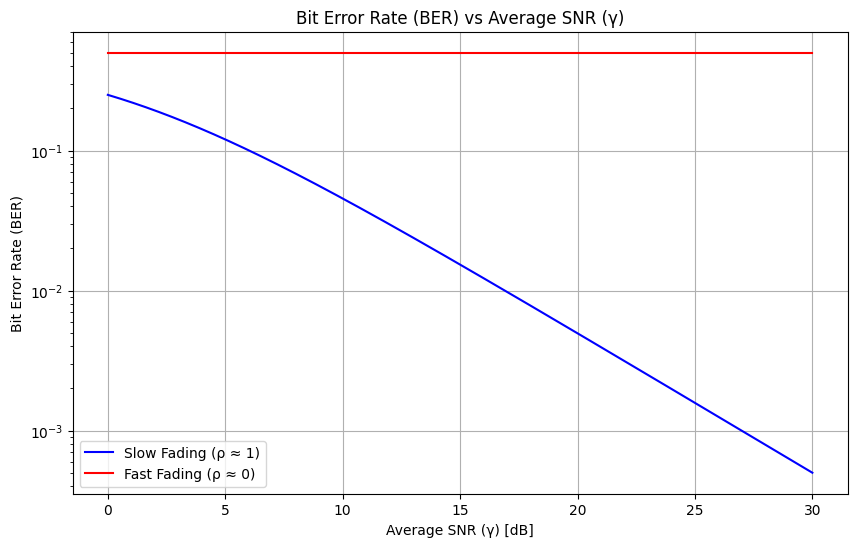

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = np.linspace(0, 30, 1000)  # Average SNR (dB)
gamma_linear = 10**(gamma / 10)  # Convert SNR from dB to linear scale

# BER for slow fading (rho ≈ 1)
Pb_slow = 0.5 * (1 / (1 + gamma_linear))

# BER for fast fading (rho ≈ 0)
Pb_fast = 0.5 * np.ones_like(gamma_linear)

# Plot BER vs SNR
plt.figure(figsize=(10, 6))
plt.semilogy(gamma, Pb_slow, 'b', label="Slow Fading (ρ ≈ 1)")
plt.semilogy(gamma, Pb_fast, 'r', label="Fast Fading (ρ ≈ 0)")
plt.title("Bit Error Rate (BER) vs Average SNR (γ)")
plt.xlabel("Average SNR (γ) [dB]")
plt.ylabel("Bit Error Rate (BER)")
plt.legend()
plt.grid()
plt.show()